# Time Series

* Contains some time period and data follows a Cronological order.

* Intervals or consecutive values of time series data should be identical. 
* There should not be any missing values. --> approximate missing values

* Assumptions: past patterns will be unchanged into the future

## Importing Packages

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats
import pylab

## Importing Data

In [3]:
raw_csv_data = pd.read_csv("Index2018.csv")

In [4]:
df_comp = raw_csv_data.copy()

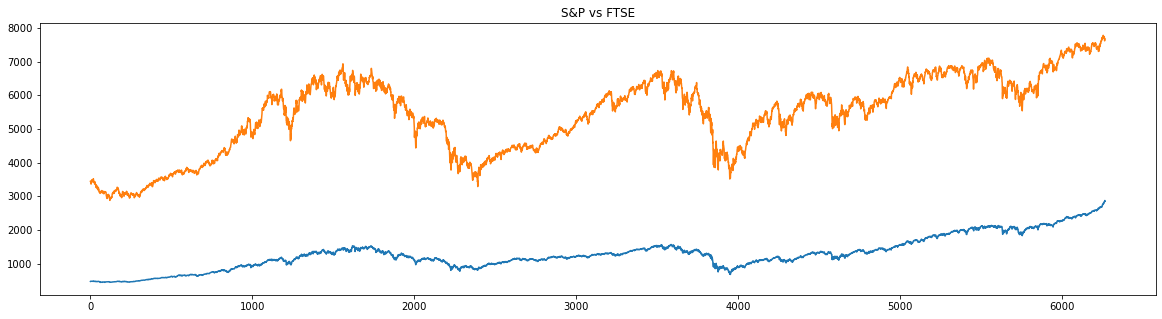

In [5]:
df_comp.spx.plot(figsize=(20,5), title = "S&P500 Prices")
df_comp.ftse.plot(figsize=(20,5), title = "FTSE100 Prices (UK)")
plt.title("S&P vs FTSE")
plt.show()

## Preprocessing Data

In [6]:
#convert to datetime data type

df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace = True) #set to index
df_comp = df_comp.asfreq('b') #b = business days only (includes all business days consecutively)

In [7]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [8]:
#checking for null values. These are probably holidays.
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [9]:
df_comp.spx = df_comp.spx.fillna(method = 'ffill') #frontfill values to null. 

In [10]:
df_comp['market_value'] = df_comp.spx

In [11]:
del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']

In [12]:
df_comp.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


## Plotting Data

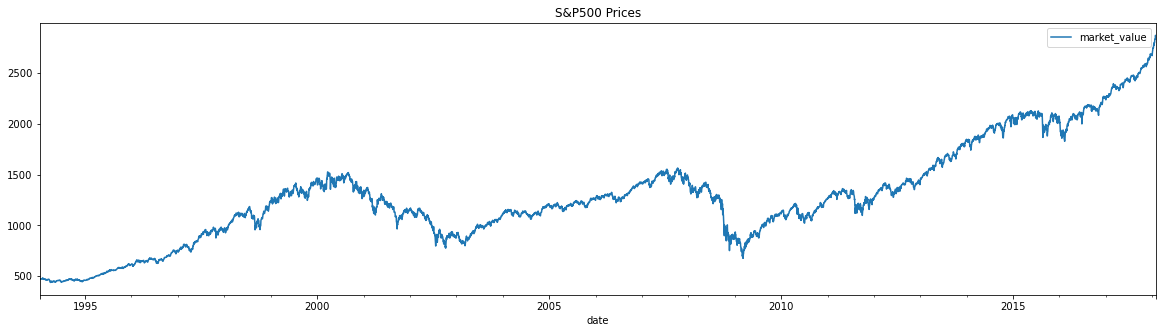

In [16]:
df_comp.plot(figsize=(20,5), title = "S&P500 Prices")
#plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

## The QQ Plot

Quantile-Quantile Plot is used to determin if a data set is distributed a certain way


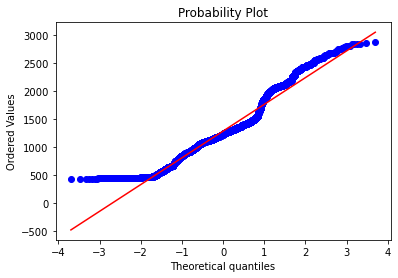

In [17]:
scipy.stats.probplot(df_comp.market_value, plot = pylab)
pylab.show()

* The red line represents what the data points should follow if normally distributed
* The x-axis shows many SD away from the mean these values are.


## Splitting Data

Testing should be the latest dataset based on datetime.

In [18]:
size = int(len(df_comp)*0.8)

In [19]:
df = df_comp.iloc[:size]

In [20]:
df_test = df_comp.iloc[size:]

In [ ]:
## Types of Time-Series
1. White Nose
2. Random Walk

## White Noise
A special type of time-series, where the data dosen't follow a pattern.

- constant mean
- constant variance 
- no autocorrelation: 
    - no clear relationship between past and present values. 
    - sequence of random data where every value has a time-period assoicated with it.(autocorrelation: measures how correlated a series is with past version of itself.)



In [23]:
#create array of values of a normal distribution
wn = np.random.normal(loc = df.market_value.mean(), #indidicates around the mean
                      scale = df.market_value.std(), #indiciates of wide the sd is.
                      size = len(df) #data points
                     ) 

In [24]:
df['wn'] = wn

<ipython-input-24-f05b4814bfab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [25]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1086.534567
std,292.559287,289.514742
min,438.920000,-80.688056
25%,914.620000,890.707544
50%,1144.650000,1082.313950
75%,1316.280729,1283.610192
max,1570.252238,2114.431049


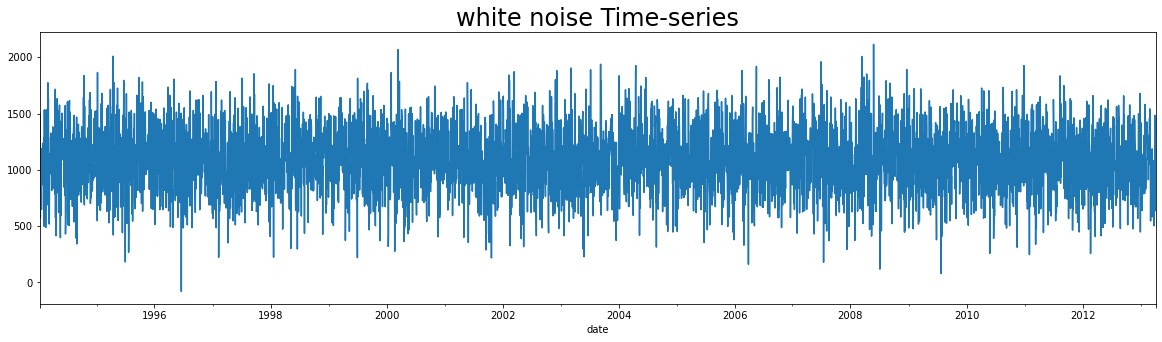

In [27]:
df.wn.plot(figsize = (20,5))
plt.title("white noise Time-series", size = 24)
plt.show()

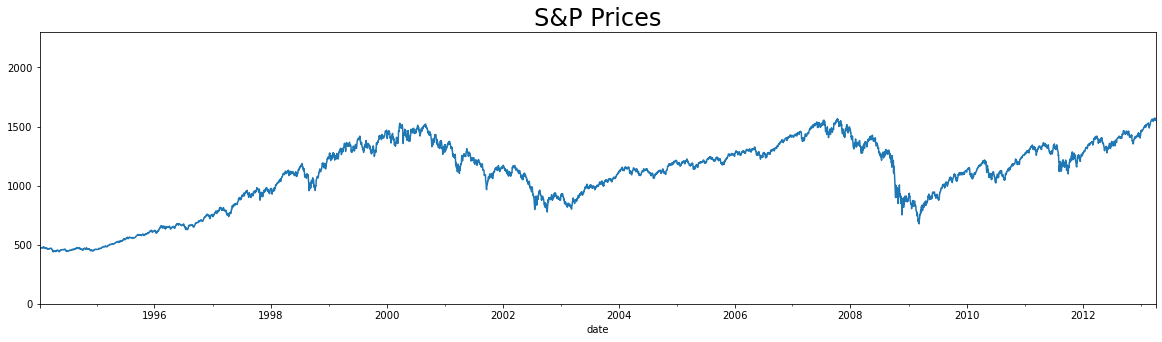

In [30]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

## Random Walk

A special type of time-series, where values tend to persit over time and the differences between periods are simply white noise.

In [34]:
#rw = pd.read_csv("randWalk.csv")
#rw.date = pd.to_datetime(rw.date, dayfirst = True)
#rw.set_index("date", inplace = True)
#rw = rw.asfreq('b')

## Stationary 

taking consecutive samples of data with the same size, should have identifical co-variance regardless of starting point.

Covariance Stationary
- constant mean
- constant variance 
- consistent covariance between periods at an identical distance from one another. same corr between 1st and 4th and 3rd and 6th.

## Dickey-Fuller Test

Null Hypothesis: Assumes non-stationarity

In [39]:
sts.adfuller(df.market_value)

(-1.7369847452352456,
 0.4121645696770613,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [ ]:
# first line - test statistics.
# second line - p-value. 
# thrid line - number of lags used in the regression
# 4th line - number of observations. 
# last line - lower the value the easier to make predictions.

In [40]:
sts.adfuller(df.wn)

(-23.163393660411643,
 0.0,
 8,
 5012,
 {'1%': -3.431655397510801,
  '5%': -2.862116844845668,
  '10%': -2.567077055158601},
 70707.4674394603)

## Seasonality

Trends will appear on a cyclical basis

Navie Decomposition
- additive
- multiplicative

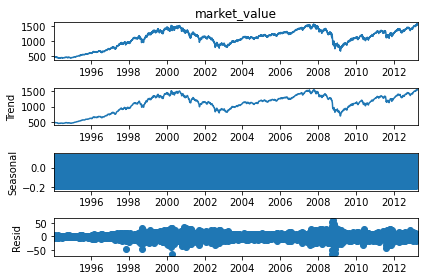

In [45]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

In [ ]:
## Autocorrelation

- the correlation between a sequence and itself. 
- measure the the lag and current time series. (day, month, year)

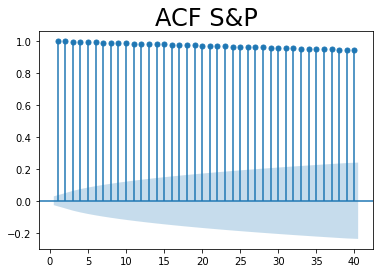

In [47]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title('ACF S&P', size = 24)
plt.show()
# the greater the distance in time, the more unlikely it is that this autocorrelation persists

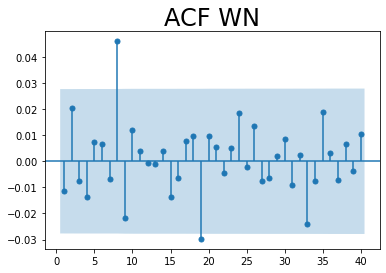

In [49]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title('ACF WN', size = 24)
plt.show()

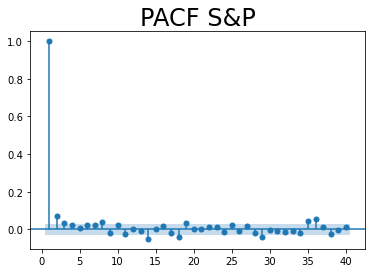

In [50]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title('PACF S&P', size = 24)
plt.show()